In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データの読み込み
iris = load_iris()
# 寸法(X)を取り出して標準化
sc = StandardScaler()
sc.fit(iris.data)
iris_X = sc.transform(iris.data)
# 品種(y)を取り出す
iris_y = iris.target
# データを分割
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, test_size = 0.3, random_state=0)

StandardScaler 是 scikit-learn 中的一个数据预处理工具，用于对数据进行标准化。标准化是一种常见的数据预处理步骤，旨在将数据转换为均值为 0，标准差为 1 的分布，从而使得数据具有零均值和单位方差。这对某些机器学习算法的性能很重要，特别是对那些依赖于距离度量或梯度下降的算法。

感知机（Perceptron）是一种简单的二元分类器，用于将输入数据分为两个类别。其基本原理如下：

模型结构： 感知机的模型结构包括输入层和输出层。输入层接收多个输入特征，每个特征都与一个权重相关联。这些输入通过加权求和的方式传递给输出层，输出层应用激活函数，产生最终的二元输出。

激活函数： 通常，感知机使用阶跃函数（Step Function）作为激活函数。输入的加权和超过某个阈值时，输出为1；否则，输出为0。这使得感知机能够产生二元分类结果。

学习算法： 感知机的学习算法是基于误差的简单规则。它采用误差修正学习，通过不断调整权重，使模型适应训练数据。具体来说，如果模型对一个样本分类错误，就调整权重以减小错误。

线性可分性： 感知机的有效性前提是训练数据是线性可分的，即存在一个超平面可以将不同类别的数据分开。如果数据不是线性可分的，感知机学习算法可能无法收敛。



梯度下降（Gradient Descent）是一种优化算法，用于找到某个函数的最小值。它的基本思想是通过不断调整参数，沿着目标函数下降最快的方向逐步逼近最小值。具体来说：

选择起始点： 从一个初始点开始，即设定一组参数的初值。

沿梯度方向调整参数： 计算目标函数在当前点的梯度，梯度指示了函数在该点上升的方向。为了使函数值减小，沿着梯度的反方向调整参数。

迭代： 不断重复步骤 2，每次调整一小步，直到找到或接近函数的最小值。

In [2]:
from sklearn.linear_model import Perceptron
# 学習
iris_pcp = Perceptron(max_iter=40, tol=1e-3, eta0=1.0,
shuffle=True)
iris_pcp.fit(X_train, y_train)
iris_pcp.predict(X_test)
# 評価
iris_pcp_pre = iris_pcp.predict(X_test)
print(accuracy_score(y_test, iris_pcp_pre))

0.8666666666666667


<Axes: >

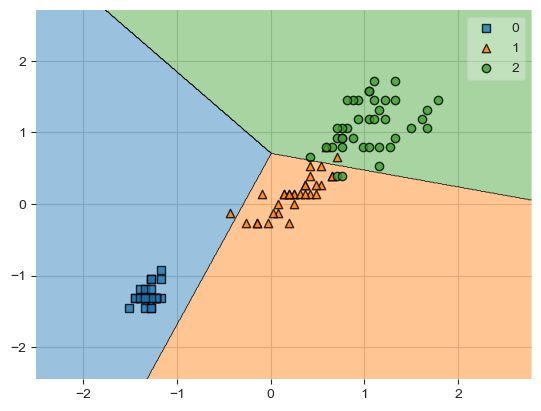

In [4]:
from mlxtend.plotting import plot_decision_regions
# 学習データを2次元にする
# （3次元目と4次元目を抜き出す）
X_train_2d = X_train[:, [2, 3]]
# これで学習
iris_pcp_2d =Perceptron(max_iter=40, tol=1e-3,eta0=1.0, shuffle=True)
iris_pcp_2d.fit(X_train_2d, y_train)
plot_decision_regions(X_train_2d, y_train,clf=iris_pcp_2d)

![Alt Text](Dic/neu1.png)

多层神经网络的非线性边界： 多层神经网络由多个层组成，每一层包含多个神经元（或节点）。在这种结构中，每个神经元通过激活函数引入非线性性质。当多层神经网络进行训练时，它可以学习到更为复杂、非线性的决策边界，使其能够更好地适应复杂的数据模式和关系。

隐藏层激活函数： 通过隐藏层的激活函数，神经网络可以学习到输入数据中的非线性关系，从而提高模型的表达能力。常见的隐藏层激活函数包括ReLU（Rectified Linear Unit）、Sigmoid、Tanh等。

输出层激活函数： 输出层的激活函数取决于问题的性质。例如，在二分类问题中，可以使用Sigmoid激活函数将输出限制在0到1之间，表示概率；在多分类问题中，Softmax激活函数常用于将输出转化为各个类别的概率分布。

![Alt Text](Dic/neu2.png)

In [8]:
from sklearn.neural_network import MLPClassifier
# 学習
iris_mlp = MLPClassifier(max_iter=10000, tol=1e-4,
shuffle=True, activation='logistic', solver='adam',
hidden_layer_sizes=(10,), verbose=1)
iris_mlp.fit(X_train, y_train)
# 評価
iris_mlp_pre = iris_mlp.predict(X_test)
print(accuracy_score(y_test, iris_mlp_pre))

Iteration 1, loss = 1.16715005
Iteration 2, loss = 1.16466033
Iteration 3, loss = 1.16219669
Iteration 4, loss = 1.15975963
Iteration 5, loss = 1.15734958
Iteration 6, loss = 1.15496690
Iteration 7, loss = 1.15261183
Iteration 8, loss = 1.15028449
Iteration 9, loss = 1.14798484
Iteration 10, loss = 1.14571265
Iteration 11, loss = 1.14346753
Iteration 12, loss = 1.14124892
Iteration 13, loss = 1.13905619
Iteration 14, loss = 1.13688866
Iteration 15, loss = 1.13474564
Iteration 16, loss = 1.13262650
Iteration 17, loss = 1.13053065
Iteration 18, loss = 1.12845757
Iteration 19, loss = 1.12640679
Iteration 20, loss = 1.12437793
Iteration 21, loss = 1.12237060
Iteration 22, loss = 1.12038447
Iteration 23, loss = 1.11841919
Iteration 24, loss = 1.11647441
Iteration 25, loss = 1.11454978
Iteration 26, loss = 1.11264492
Iteration 27, loss = 1.11075943
Iteration 28, loss = 1.10889289
Iteration 29, loss = 1.10704485
Iteration 30, loss = 1.10521484
Iteration 31, loss = 1.10340235
Iteration 32, los

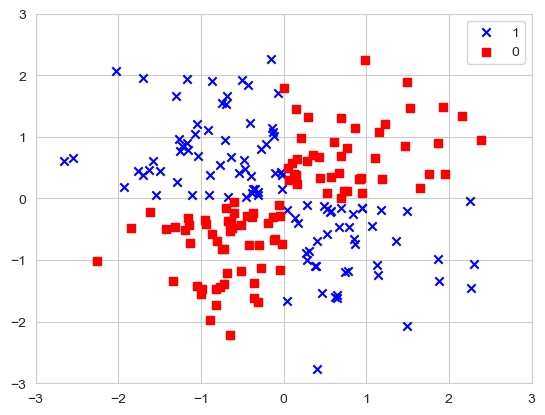

In [10]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1],
c='r', marker='s', label='0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')

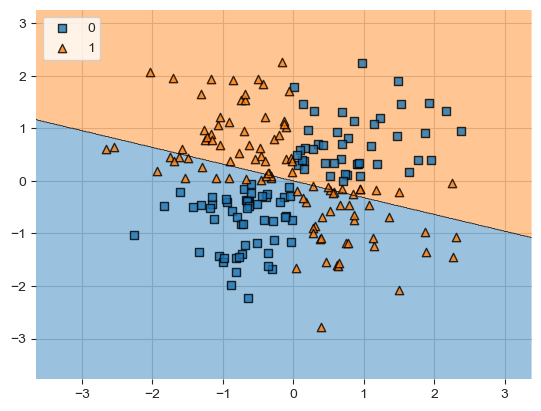

In [14]:
#単層パーセプトロン
xor_pcp = Perceptron(max_iter=9, tol=1e-3, eta0=0.1,shuffle=True, random_state=0)
xor_pcp.fit(X_xor, y_xor)
# 境界をプロット
plot_decision_regions(X_xor, y_xor, clf=xor_pcp)
plt.legend(loc='upper left')

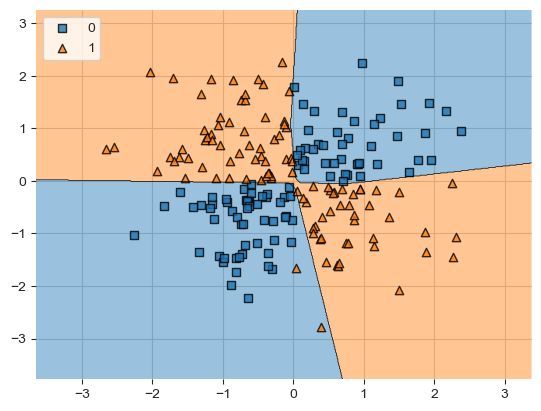

In [23]:
#多層パーセプトロン
xor_mlp = MLPClassifier(max_iter=10000,hidden_layer_sizes=(2,5), activation='relu',random_state=0,learning_rate='constant', learning_rate_init=0.01)
xor_mlp.fit(X_xor, y_xor)
# 境界をプロット
plot_decision_regions(X_xor, y_xor, clf=xor_mlp)
plt.legend(loc='upper left')